<a href="https://colab.research.google.com/github/petapeanut/Assignment1/blob/master/A1_DynProg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gym

In [2]:
gym.envs.register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.74
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# Create the gridworld-like environment
env=gym.make('FrozenLakeNotSlippery-v0')
# Let's look at the model of the environment (i.e., P):
env.env.P
# Question: what is the data in this structure saying? Relate this to the course
# presentation of P

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


{0: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 4, 0.0, False)],
  2: [(1.0, 1, 0.0, False)],
  3: [(1.0, 0, 0.0, False)]},
 1: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 5, 0.0, True)],
  2: [(1.0, 2, 0.0, False)],
  3: [(1.0, 1, 0.0, False)]},
 2: {0: [(1.0, 1, 0.0, False)],
  1: [(1.0, 6, 0.0, False)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 2, 0.0, False)]},
 3: {0: [(1.0, 2, 0.0, False)],
  1: [(1.0, 7, 0.0, True)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 3, 0.0, False)]},
 4: {0: [(1.0, 4, 0.0, False)],
  1: [(1.0, 8, 0.0, False)],
  2: [(1.0, 5, 0.0, True)],
  3: [(1.0, 0, 0.0, False)]},
 5: {0: [(1.0, 5, 0, True)],
  1: [(1.0, 5, 0, True)],
  2: [(1.0, 5, 0, True)],
  3: [(1.0, 5, 0, True)]},
 6: {0: [(1.0, 5, 0.0, True)],
  1: [(1.0, 10, 0.0, False)],
  2: [(1.0, 7, 0.0, True)],
  3: [(1.0, 2, 0.0, False)]},
 7: {0: [(1.0, 7, 0, True)],
  1: [(1.0, 7, 0, True)],
  2: [(1.0, 7, 0, True)],
  3: [(1.0, 7, 0, True)]},
 8: {0: [(1.0, 8, 0.0, False)],
  1: [(1.0, 12, 0.0, True)],
  2: [(



---


The data in this structure represents the dynamic function p, which maps (state
index, action) to below parameters:
e.g. [(1.0, 14, 0.0, False)]
1. The probability of transitioning to the next state: always equal to 1 in this case;
2. The index of next state;
3. The reward: 1.0 if moving to state 15, 0.0 otherwise.
4. Indication of whether the state terminate the episode.


In [4]:
# Now let's investigate the observation space (i.e., S using our nomenclature),
# and confirm we see it is a discrete space with 16 locations
print(env.observation_space)

Discrete(16)


In [5]:
stateSpaceSize = env.observation_space.n
print(stateSpaceSize)

16


In [6]:
# Now let's investigate the action space (i.e., A) for the agent->environment
# channel
print(env.action_space)

Discrete(4)


In [7]:
# The gym environment has ...sample() functions that allow us to sample
# from the above spaces:
for g in range(1,10,1):
  print("sample from S:",env.observation_space.sample()," ... ","sample from A:",env.action_space.sample())



sample from S: 12  ...  sample from A: 0
sample from S: 14  ...  sample from A: 2
sample from S: 3  ...  sample from A: 2
sample from S: 10  ...  sample from A: 3
sample from S: 0  ...  sample from A: 0
sample from S: 8  ...  sample from A: 2
sample from S: 3  ...  sample from A: 1
sample from S: 8  ...  sample from A: 1
sample from S: 9  ...  sample from A: 0


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


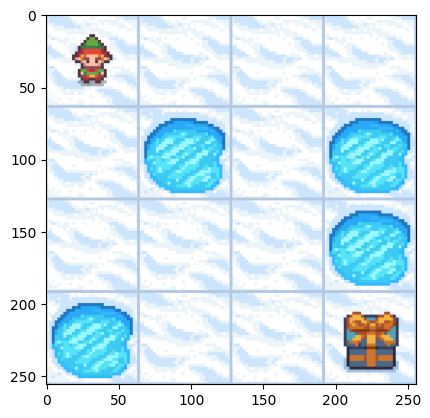

In [8]:
import matplotlib.pyplot as plt

# The enviroment also provides a helper to render (visualize) the environment
env.reset()
# https://stackoverflow.com/questions/50107530/how-to-render-openai-gym-in-google-colab
plt.imshow(env.render(mode='rgb_array'))

Enter the action as an integer from 0 to 4  (or exit): 
1
--> The result of taking action 1 is:
     S= 4
     R= 0.0
     p= {'prob': 1.0}
Enter the action as an integer from 0 to 4  (or exit): 
1
--> The result of taking action 1 is:
     S= 8
     R= 0.0
     p= {'prob': 1.0}
Enter the action as an integer from 0 to 4  (or exit): 
2
--> The result of taking action 2 is:
     S= 9
     R= 0.0
     p= {'prob': 1.0}
Enter the action as an integer from 0 to 4  (or exit): 
1
--> The result of taking action 1 is:
     S= 13
     R= 0.0
     p= {'prob': 1.0}
Enter the action as an integer from 0 to 4  (or exit): 
2
--> The result of taking action 2 is:
     S= 14
     R= 0.0
     p= {'prob': 1.0}
Enter the action as an integer from 0 to 4  (or exit): 
2
--> The result of taking action 2 is:
     S= 15
     R= 1.0
     p= {'prob': 1.0, 'TimeLimit.truncated': False}
Enter the action as an integer from 0 to 4  (or exit): 
exit


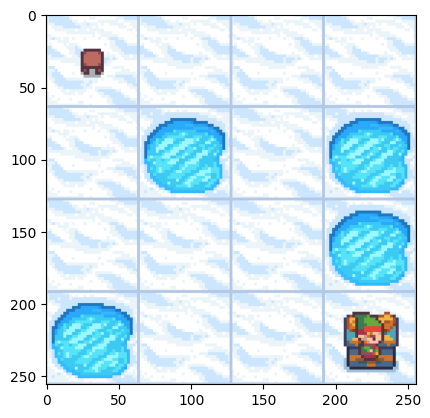

In [25]:
# We can act as the agent, by selecting actions and stepping the environment
# through time to see its responses to our actions
env.reset()
exitCommand=False

while not(exitCommand):
  plt.imshow(env.render(mode='rgb_array'))
  print("Enter the action as an integer from 0 to",env.action_space.n," (or exit): ")
  userInput=input()
  if userInput=="exit":
    break
  action=int(userInput)
  (observation, reward, compute, probability) = env.step(action)
  print("--> The result of taking action",action,"is:")
  print("     S=",observation)
  print("     R=",reward)
  print("     p=",probability)

  plt.imshow(env.render(mode='rgb_array'))


In [10]:
# Question: draw a table indicating the correspondence between the action
# you input (a number) and the logic action performed.
# Question: draw a table that illustrates what the symbols on the render image
# mean?
# Question: Explain what the objective of the agent is in this environment?



---
```
**Input | Action**
  0     | Left
  1     | Down
  2     | Right
  3     | Up
```


---
```
**Symbol          | Meaning**
  Chair           | Starting point
  Frozen Surface  | Walkable route
  Ice Hole        | Will break if step on
  Gift            | Goal
```


---
The objective of the agent is to **safely** reach the **goal** point.

In [11]:
# Practical: Code up an AI that will employ random action selection in order
# to drive the agent. Test this random action selection agent with the
# above environment (i.e., code up a loop as I did above, but instead
# of taking input from a human user, take it from the AI you coded).

--> The result of taking action 1 is:
     S= 4
     R= 0.0
     p= {'prob': 1.0}
--> The result of taking action 1 is:
     S= 8
     R= 0.0
     p= {'prob': 1.0}
--> The result of taking action 1 is:
     S= 12
     R= 0.0
     p= {'prob': 1.0, 'TimeLimit.truncated': False}
--> The result of taking action 1 is:
     S= 12
     R= 0
     p= {'prob': 1.0, 'TimeLimit.truncated': False}
--> The result of taking action 1 is:
     S= 12
     R= 0
     p= {'prob': 1.0, 'TimeLimit.truncated': False}
--> The result of taking action 1 is:
     S= 12
     R= 0
     p= {'prob': 1.0, 'TimeLimit.truncated': False}
--> The result of taking action 1 is:
     S= 12
     R= 0
     p= {'prob': 1.0, 'TimeLimit.truncated': False}
--> The result of taking action 1 is:
     S= 12
     R= 0
     p= {'prob': 1.0, 'TimeLimit.truncated': False}


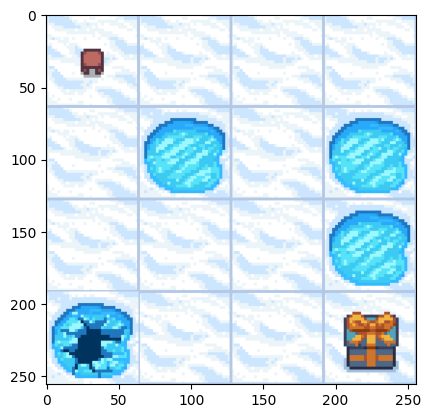

In [55]:
import random
"""
Function to test drive an agent against the environment.
Terminates after the same state is repeated n times.

Parameters
----------
env : Gym Env
action : randomly generated number for action within [0:3]
"""
def AI_agent(env, action, terminate_after_n=5):
    env.reset()
    previous_observation = None
    repeats = 0

    while True:

        # Sample from action space using the built-in function
        (observation, reward, compute, probability) = env.step(action)
        print("--> The result of taking action",action,"is:")
        print("     S=",observation)
        print("     R=",reward)
        print("     p=",probability)

        # Terminate if stuck in a state
        if observation == previous_observation:
            repeats += 1
            if repeats >= terminate_after_n:
                break
        else:
            repeats = 0
            previous_observation = observation
    plt.imshow(env.render(mode='rgb_array'))

random.seed(22)
action = random.randint(0, 3)
AI_agent(env, action)

In [12]:
# Now towards dynamic programming. Note that env.env.P has the model
# of the environment.
#
# Question: How would you represent the agent's policy function and value function?
# Practical: revise the above AI solver to use a policy function in which you
# code the random action selections in the policy function. Test this.
# Practical: Code the C-4 Policy Evaluation (Prediction) algorithm. You may use
# either the inplace or ping-pong buffer (as described in the lecture). Now
# randomly initialize your policy function, and compute its value function.
# Report your results: policy and value function. Ensure your prediction
# algo reports how many iterations it took.
#
# (Optional): Repeat the above for q.



---
The agent's policy function can be represented as an N-element array lookup table containing integer action indices, where each index corresponds to a 100% probability of choosing that specific action in a given state.


---



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


--> The result of taking action 1 is:
     S= 4
     R= 0.0
     p= {'prob': 1.0}
--> The result of taking action 2 is:
     S= 5
     R= 0.0
     p= {'prob': 1.0, 'TimeLimit.truncated': False}
--> The result of taking action 1 is:
     S= 5
     R= 0
     p= {'prob': 1.0, 'TimeLimit.truncated': False}
--> The result of taking action 1 is:
     S= 5
     R= 0
     p= {'prob': 1.0, 'TimeLimit.truncated': False}
--> The result of taking action 1 is:
     S= 5
     R= 0
     p= {'prob': 1.0, 'TimeLimit.truncated': False}
--> The result of taking action 1 is:
     S= 5
     R= 0
     p= {'prob': 1.0, 'TimeLimit.truncated': False}
--> The result of taking action 1 is:
     S= 5
     R= 0
     p= {'prob': 1.0, 'TimeLimit.truncated': False}


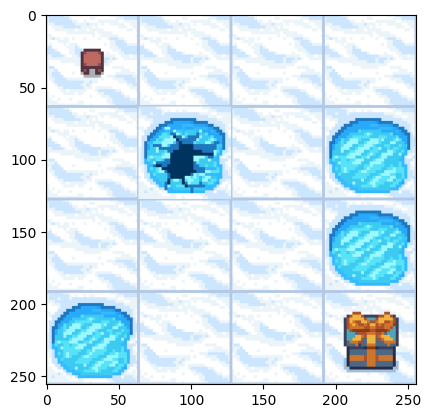

In [56]:
# Practical: revise the above AI solver to use a policy function in which you
# code the random action selections in the policy function. Test this.

"""
Function to test drive an agent against the environment.
Terminates after the same state is repeated n times.

Parameters
----------
env : Gym Env
policy : randomly generated number for action based on policy function and env
"""
def AI_agent_revised(env, policy, terminate_after_n=5):
    env.reset()
    previous_observation = None
    repeats = 0

    while True:

        # Sample from action space using the built-in function
        action = policy(env)
        (observation, reward, compute, probability) = env.step(action)
        print("--> The result of taking action",action,"is:")
        print("     S=",observation)
        print("     R=",reward)
        print("     p=",probability)

        # Terminate if stuck in a state
        if observation == previous_observation:
            repeats += 1
            if repeats >= terminate_after_n:
                break
        else:
            repeats = 0
            previous_observation = observation

    plt.imshow(env.render(mode='rgb_array'))

human_policy = [
    1, 1, 0, 0,
    2, 1, 0, 1,
    1, 2, 1, 0,
    2, 2, 1, 0
]

policy = lambda env: human_policy[env.env.s]
AI_agent_revised(env, policy)

In [73]:
# Practical: Code the C-4 Policy Evaluation (Prediction) algorithm. You may use
# either the inplace or ping-pong buffer (as described in the lecture). Now
# randomly initialize your policy function, and compute its value function.

# Report your results: policy and value function. Ensure your prediction
# algo reports how many iterations it took.

import numpy as np

# referenced from Iterative Policy Evaluation in page 75 of the textbook
def policy_evaluation(policy, theta, gamma, env, V=None, print_n_iter=False):
    S = env.observation_space.n
    V = np.zeros(S) if V is None else V
    n_iter = 0

    while True:
        n_iter += 1
        delta = 0
        for s in range(S):
            v = V[s]
            a = policy[s]
            V[s] = sum(p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][a])
            delta = max(delta, abs(v - V[s]))

        if delta < theta:
            if print_n_iter:
                print(f"Converged in {n_iter} iterations")
            return V

def initialize_v(env, seed=None):
    V = np.random.RandomState(seed).rand(env.observation_space.n)
    V[env.desc.ravel() == b'G'] = 0
    V[env.desc.ravel() == b'H'] = 0
    return V

# Main
def main():
    policy = np.random.RandomState(0).randint(0, 4, size=env.observation_space.n)
    V_init = initialize_v(env, seed=0)
    V = policy_evaluation(policy, 1e-6, 0.9, env, V=V_init, print_n_iter=True)

    with np.printoptions(precision=3, suppress=True):
        print("Randomly initialized policy:")
        print(policy.reshape(4, 4))
        print(np.array([["\u2190", "\u2193", "\u2192", "\u2191"][a] for a in policy]).reshape(4, 4))
        print("Final values:")
        print(V.reshape(4, 4))

# Call the main function
main()


Converged in 108 iterations
Randomly initialized policy:
[[0 3 1 0]
 [3 3 3 3]
 [1 3 1 2]
 [0 3 2 0]]
[['←' '↑' '↓' '←']
 ['↑' '↑' '↑' '↑']
 ['↓' '↑' '↓' '→']
 ['←' '↑' '→' '←']]
Final values:
[[0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.9 0. ]
 [0.  0.  1.  0. ]]


In [ ]:
# Policy Improvement:
# Question: How would you use P and your value function to improve an arbitrary
# policy, pi, per Chapter 4?
# Practical: Code the policy iteration process, and employ it to arrive at a
# policy that solves this problem. Show your testing results, and ensure
# it reports the number of iterations for each step: (a) overall policy
# iteration steps and (b) evaluation steps.
# Practical: Code the value iteration process, and employ it to arrive at a
# policy that solves this problem. Show your testing results, reporting
# the iteration counts.
# Comment on the difference between the iterations required for policy vs
# value iteration.
#
# Optional: instead of the above environment, use the "slippery" Frozen Lake via
# env = gym.make("FrozenLake-v0")



---
By using the policy iteration approach: repeatedly perform policy evaluation and policy improvement until the value and policy functions converges.


---



Policy iteration step: 1
Converged in 20 iterations
Policy iteration step: 2
Converged in 2 iterations
Policy iteration step: 3
Converged in 2 iterations
Policy iteration step: 4
Converged in 2 iterations
Policy iteration step: 5
Converged in 2 iterations
Optimized value function:
[[0.59  0.656 0.729 0.656]
 [0.656 0.    0.81  0.   ]
 [0.729 0.81  0.9   0.   ]
 [0.    0.9   1.    0.   ]]
Optimized policy:
[[1 2 1 0]
 [1 0 1 0]
 [2 1 1 0]
 [0 2 2 0]]
[['↓' '→' '↓' '←']
 ['↓' '←' '↓' '←']
 ['→' '↓' '↓' '←']
 ['←' '→' '→' '←']]

Testing policy:
--> The result of taking action 1 is:
     S= 4
     R= 0.0
     p= {'prob': 1.0}
--> The result of taking action 1 is:
     S= 8
     R= 0.0
     p= {'prob': 1.0}
--> The result of taking action 2 is:
     S= 9
     R= 0.0
     p= {'prob': 1.0}
--> The result of taking action 1 is:
     S= 13
     R= 0.0
     p= {'prob': 1.0}
--> The result of taking action 2 is:
     S= 14
     R= 0.0
     p= {'prob': 1.0}
--> The result of taking action 2 is:
  

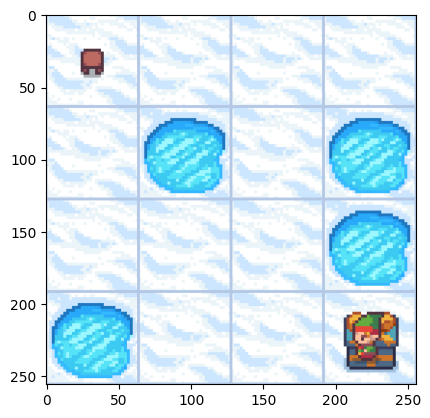

In [74]:
# Practical: Code the policy iteration process, and employ it to arrive at a
# policy that solves this problem. Show your testing results, and ensure
# it reports the number of iterations for each step: (a) overall policy
# iteration steps and (b) evaluation steps.

import numpy as np

# referenced from Policy Iteration in page 80 of the textbook
def policy_iteration(theta, gamma, env, seed=None, print_n_iter=False):
    S = env.observation_space.n
    A = env.action_space.n

    V = initialize_v(env, seed)
    policy = np.random.RandomState(seed).randint(0, A, size=S)
    stable_policy = False
    iteration = 0

    while not stable_policy:
        iteration += 1
        if print_n_iter:
            print(f"Policy iteration step: {iteration}")

        V = policy_evaluation(policy, theta, gamma, env, V, print_n_iter)
        stable_policy = True

        for s in range(S):
            old_action = policy[s]
            action_values = np.zeros(A)

            for a in range(A):
                action_values[a] = sum(p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][a])
            policy[s] = np.argmax(action_values)

            if old_action != policy[s]:
                stable_policy = False

    return V, policy

def main():
    V_star, pi_star = policy_iteration(1e-2, 0.9, env, seed=0, print_n_iter=True)

    with np.printoptions(precision=3, suppress=True):
        print("Optimized value function:")
        print(V_star.reshape(4, 4))
        print("Optimized policy:")
        print(pi_star.reshape(4, 4))
        print(np.array([["\u2190", "\u2193", "\u2192", "\u2191"][a] for a in pi_star]).reshape(4, 4))

    print()
    print("Testing policy:")
    AI_agent_revised(env, lambda env: pi_star[env.env.s])

# Call the main function
main()

Value iteration converged in 7 iterations
Optimized value function:
[[0.59  0.656 0.729 0.656]
 [0.656 0.    0.81  0.   ]
 [0.729 0.81  0.9   0.   ]
 [0.    0.9   1.    0.   ]]
Optimized policy:
[[1 2 1 0]
 [1 0 1 0]
 [2 1 1 0]
 [0 2 2 0]]
[['↓' '→' '↓' '←']
 ['↓' '←' '↓' '←']
 ['→' '↓' '↓' '←']
 ['←' '→' '→' '←']]
Testing policy:
--> The result of taking action 1 is:
     S= 4
     R= 0.0
     p= {'prob': 1.0}
--> The result of taking action 1 is:
     S= 8
     R= 0.0
     p= {'prob': 1.0}
--> The result of taking action 2 is:
     S= 9
     R= 0.0
     p= {'prob': 1.0}
--> The result of taking action 1 is:
     S= 13
     R= 0.0
     p= {'prob': 1.0}
--> The result of taking action 2 is:
     S= 14
     R= 0.0
     p= {'prob': 1.0}
--> The result of taking action 2 is:
     S= 15
     R= 1.0
     p= {'prob': 1.0, 'TimeLimit.truncated': False}
--> The result of taking action 0 is:
     S= 15
     R= 0
     p= {'prob': 1.0, 'TimeLimit.truncated': False}
--> The result of taking action

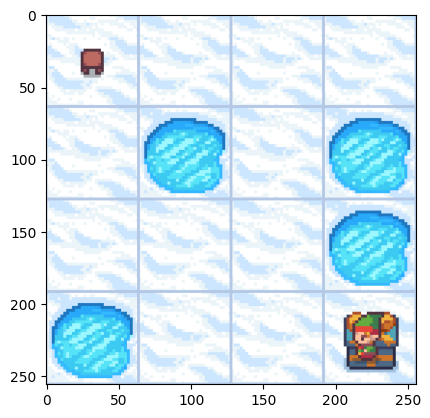

In [75]:
# Practical: Code the value iteration process, and employ it to arrive at a
# policy that solves this problem. Show your testing results, reporting
# the iteration counts.

import numpy as np

# referenced from Value Iteration in page 83 of the textbook
def value_iteration(theta, gamma, env, seed=None, print_n_iter=False):
    S = env.observation_space.n
    A = env.action_space.n

    # Initialize value function
    V = initialize_v(env, seed)
    n_iter = 0

    # Value iteration
    while True:
        n_iter += 1
        delta = 0

        for s in range(S):
            v = V[s]
            action_values = np.zeros(A)

            for a in range(A):
                action_values[a] = sum(p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][a])
            V[s] = max(action_values)
            delta = max(delta, abs(v - V[s]))

        if delta < theta:
            if print_n_iter:
                print(f"Value iteration converged in {n_iter} iterations")
            break

    # Derive policy from value function
    policy = np.zeros(S, dtype=int)
    for s in range(S):
        action_values = np.zeros(A)
        for a in range(A):
            action_values[a] = sum(p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][a])
        policy[s] = np.argmax(action_values)

    return V, policy

def main():
    V_star, pi_star = value_iteration(1e-2, 0.9, env, seed=0, print_n_iter=True)

    with np.printoptions(precision=3, suppress=True):
        print("Optimized value function:")
        print(V_star.reshape(4, 4))
        print("Optimized policy:")
        print(pi_star.reshape(4, 4))
        print(np.array([["\u2190", "\u2193", "\u2192", "\u2191"][a] for a in pi_star]).reshape(4, 4))

    print("Testing policy:")
    AI_agent_revised(env, lambda env: pi_star[env.env.s])

# Execute the main function
main()


In [ ]:
# Comment on the difference between the iterations required for policy vs
# value iteration.



---
Value iteration only takes 7 iterations to converage to the optimized solution while policy iteration takes 5 rounds of iteration and each round needs at least 2 iterations to reach the final convergence.

Therefore, value iteration method is faster.

